## Week 12 Assignment - W200 Introduction to Data Science Programming, UC Berkeley MIDS

Write code in this Jupyter Notebook to solve the following problems. This assignment addresses material covered in Unit 11. Please upload this **Notebook** with your solutions to your GitHub repository in your SUBMISSIONS/week_12 folder by 11:59PM PST the night before class. Do **NOT** push/upload the data file. If you turn-in anything on ISVC please do so under the Week 12 Assignment category. 

## Objectives

- Explore and glean insights from a real dataset using pandas
- Practice using pandas for exploratory analysis, information gathering, and discovery
- Practice using matplotlib for data visualization

## Dataset

You are to analyze campaign contributions to the 2016 U.S. presidential primary races made in California. Use the csv file located here: https://drive.google.com/file/d/1Lgg-PwXQ6TQLDowd6XyBxZw5g1NGWPjB/view?usp=sharing. You should download and save this file in the same folder as this notebook is stored.  This file originally came from the U.S. Federal Election Commission (https://www.fec.gov/).

**DO NOT PUSH THIS FILE TO YOUR GITHUB REPO!**

- Best practice is to not have DATA files in your code repo. As shown below, the default load is outside of the folder this notebook is in. If you change the folder where the file is stored please update the first cell!
- If you do accidentally push the file to your github repo - follow the directions here to fix it: https://docs.google.com/document/d/15Irgb5V5G7pKPWgAerH7FPMpKeQRunbNflaW-hR2hTA/edit?usp=sharing

Documentation for this data can be found here: https://drive.google.com/file/d/11o_SByceenv0NgNMstM-dxC1jL7I9fHL/view?usp=sharing

## General Guidelines:

- This is a **real** dataset and so it may contain errors and other pecularities to work through
- This dataset is ~218mb, which will take some time to load (and probably won't load in Google Sheets or Excel)
- If you make assumptions, annotate them in your responses
- While there is one code/markdown cell positioned after each question as a placeholder, some of your code/responses may require multiple cells
- Double-click the markdown cells that say YOUR ANSWER HERE to enter your written answers. If you need more cells for your written answers, make them markdown cells (rather than code cells)

## Setup

Run the two cells below. 

The first cell will load the data into a pandas dataframe named `contrib`. Note that a custom date parser is defined to speed up loading. If Python were to guess the date format, it would take even longer to load.  

The second cell subsets the dataframe to focus on just the primary period through May 2016. Otherwise, we would see general election donations which would make it harder to draw conclusions about the primaries.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime

# These commands below set some options for pandas and to have matplotlib show the charts in the notebook
pd.set_option('display.max_rows', 1000)
pd.options.display.float_format = '{:,.2f}'.format
%matplotlib inline

# Define a date parser to pass to read_csv
d = lambda x: pd.datetime.strptime(x, '%d-%b-%y')

# Load the data
# We have this defaulted to the folder OUTSIDE of your repo - please change it as needed
contrib = pd.read_csv('../../P00000001-CA.csv', index_col=False, parse_dates=['contb_receipt_dt'], date_parser=d)
print(contrib.shape)

# Note - for now, it is okay to ignore the warning about mixed types. 

C:\Users\Victor\AppData\Roaming\Python\Python38\site-packages\IPython\core\interactiveshell.py:3169: DtypeWarning: Columns (6,11,12) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
<ipython-input-2-dd347e7b406c>:11: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  d = lambda x: pd.datetime.strptime(x, '%d-%b-%y')


(1125659, 18)


In [3]:
# Subset data to primary period 
contrib = contrib.copy()[contrib['contb_receipt_dt'] <= datetime.datetime(2016, 5, 31)]
print(contrib.shape)

(654502, 18)


## 1. Data  Exploration (20 points)

**1a. First, take a preliminary look at the data.**
- Print the *shape* of the data. What does this tell you about the number of variables and rows you have?
- Print a list of column names. 
- Review the documentation for this data (link above). Do you have all of the columns you expect to have?
- Sometimes variable names are not clear unless we read the documentation. In your own words, based on the documentation, what information does the `election_tp` variable contain?

In [4]:
# 1a YOUR CODE HERE

# print shape of data
print(contrib.shape)

df = pd.DataFrame(contrib)
# print list of col names
print(df.columns)

df['contb_receipt_amt'].sum()


(654502, 18)
Index(['cmte_id', 'cand_id', 'cand_nm', 'contbr_nm', 'contbr_city',
       'contbr_st', 'contbr_zip', 'contbr_employer', 'contbr_occupation',
       'contb_receipt_amt', 'contb_receipt_dt', 'receipt_desc', 'memo_cd',
       'memo_text', 'form_tp', 'file_num', 'tran_id', 'election_tp'],
      dtype='object')


82793229.50999999

`1a YOUR RESPONSE HERE`

Review the documentation for this data (link above). Do you have all of the columns you expect to have?
**Answer = I do have all the expected columns.**

Sometimes variable names are not clear unless we read the documentation. In your own words, based on the 
documentation, what information does the `election_tp` variable contain?

**Answer = The 'election_tp' is a string that represents the year and type of election.**

**1b. Print the first 5 rows from the dataset to manually check some of the data.** 

This is a good idea to ensure the data loaded and the columns parsed correctly!

In [5]:
# 1b YOUR CODE HERE
df.head(5)


,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num,tran_id,election_tp
0,C00575795,P00003392,"Clinton, Hillary Rodham","AULL, ANNE",LARKSPUR,CA,"949,391,913.00",NaN,RETIRED,50.00,2016-04-26,NaN,X,* HILLARY VICTORY FUND,SA18,1091718,C4768722,P2016
1,C00575795,P00003392,"Clinton, Hillary Rodham","CARROLL, MARYJEAN",CAMBRIA,CA,"934,284,638.00",NaN,RETIRED,200.00,2016-04-20,NaN,X,* HILLARY VICTORY FUND,SA18,1091718,C4747242,P2016
2,C00575795,P00003392,"Clinton, Hillary Rodham","GANDARA, DESIREE",FONTANA,CA,"923,371,507.00",NaN,RETIRED,5.00,2016-04-02,NaN,X,* HILLARY VICTORY FUND,SA18,1091718,C4666603,P2016
3,C00577130,P60007168,"Sanders, Bernard","LEE, ALAN",CAMARILLO,CA,"930,111,214.00",AT&T GOVERNMENT SOLUTIONS,SOFTWARE ENGINEER,40.00,2016-03-04,NaN,NaN,* EARMARKED CONTRIBUTION: SEE BELOW,SA17A,1077404,VPF7BKWA097,P2016
4,C00577130,P60007168,"Sanders, Bernard","LEONELLI, ODETTE",REDONDO BEACH,CA,"902,784,310.00",VERICOR ENTERPRISES INC.,PHARMACIST,35.00,2016-03-05,NaN,NaN,* EARMARKED CONTRIBUTION: SEE BELOW,SA17A,1077404,VPF7BKX3MB3,P2016


**1c. Pick three variables from the dataset above and run some quick sanity checks.**

When working with a new dataset, it is important to explore and sanity check your variables. For example, you may want to examine the maximum and minimum values, a frequency count, or something else. Use the three markdown cells below to explain if your **three** chosen variables "pass" your sanity checks or if you have concerns about the integrity of your data and why. 

In [6]:
# 1c YOUR CODE HERE for variable #1
length = len(df)
print(length)
df.describe()
# min of the contb_receipt_amt col
min = df['contb_receipt_amt'].min()
print(min)

654502
-10000.0


In [7]:
# 1c YOUR CODE HERE for variable #2

mean = df['contb_receipt_amt'].mean()
# mean of the contb_receipt_amt col
print(mean)


126.4980542611056


In [8]:
# 1c YOUR CODE HERE for variable #3

max = df['contb_receipt_amt'].max()
# max of the contb_receipt_amt col
print(max)

10800.0


`1c YOUR RESPONSE HERE`

I have reviewed the contb_receipt_amt col very closely. I calculated the contribution dollar amount’s minimum, mean, and max. There is a large negative dollar amount which leads to believe that the large negative number will skew the mean. 

**1d. Plotting a histogram** 

Make a histogram of **one** of the variables you picked above. What are some insights that you can see from this histogram? 
Remember to include on your histogram:
- Include a title
- Include axis labels
- The correct number of bins to see the breakout of values
- Hint: For some variables the range of values is very large. To do a better exploration, make the initial histogram the full range and then you can make a smaller histogram 'zoomed' in on a discreet range.

Text(0, 0.5, 'Donors')

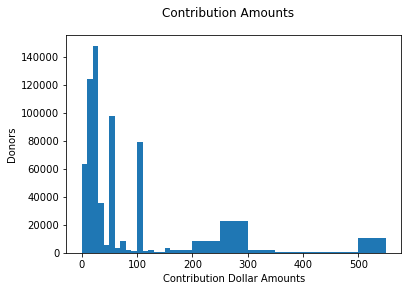

In [9]:
# 1d YOUR CODE HERE

plt.suptitle('Contribution Amounts')

# df['contb_receipt_amt'].hist(bins=4)
# plt.hist(df['contb_receipt_amt'])
plt.hist(df['contb_receipt_amt'], bins=[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 200, 250, 300, 350, 400, 500, 550])
plt.xlabel('Contribution Dollar Amounts')
plt.ylabel('Donors')
         


`1d YOUR RESPONSE HERE`

I noticed that most donation are under $100.00. So adjusting the histogram bin was very key. 

## 2. Exploring Campaign Contributions (30 points)

Let's investigate the donations to the candidates.

**2a. Present a table that shows the number of donations to each candidate sorted by number of donations.**

- When presenting data as a table, it is often best to sort the data in a meaningful way. This makes it easier for your reader to examine what you've done and to glean insights.  From now on, all tables that you present in this assignment (and course) should be sorted.
- Hint: Use the `groupby` method. Groupby is explained in Unit 13: async 13.3 & 13.5
- Hint: Use the `sort_values` method to sort the data so that candidates with the largest number of donations appear on top.

Which candidate received the largest number of contributions (variable 'contb_receipt_amt')?

In [10]:
# 2a YOUR CODE HERE

df_donation_count = pd.DataFrame(df.groupby(by=['cand_nm'])['contb_receipt_amt'].count().sort_values(ascending=False))
print(df_donation_count)

                           contb_receipt_amt
cand_nm                                     
Sanders, Bernard                      371795
Clinton, Hillary Rodham               163509
Cruz, Rafael Edward 'Ted'              57136
Carson, Benjamin S.                    27342
Rubio, Marco                           14089
Fiorina, Carly                          4696
Paul, Rand                              4256
Bush, Jeb                               3114
Kasich, John R.                         2988
Trump, Donald J.                        2255
Walker, Scott                            713
Huckabee, Mike                           531
O'Malley, Martin Joseph                  397
Lessig, Lawrence                         372
Graham, Lindsey O.                       342
Christie, Christopher J.                 333
Stein, Jill                              197
Perry, James R. (Rick)                   116
Webb, James Henry Jr.                    106
Santorum, Richard J.                      84
Johnson, G

`2a YOUR RESPONSE HERE`
Sanders, Bernard recieved the most individual donations, 371795

**2b. Now, present a table that shows the total value of donations to each candidate. sorted by total value of the donations**

Which candidate raised the most money in California?

In [11]:
# 2b YOUR CODE HERE

df_donation_amount = pd.DataFrame(df.groupby(by=['cand_nm'])['contb_receipt_amt'].sum().sort_values(ascending=False))
print(df_donation_amount)

                           contb_receipt_amt
cand_nm                                     
Clinton, Hillary Rodham        39,368,777.01
Sanders, Bernard               18,773,871.31
Cruz, Rafael Edward 'Ted'       6,286,460.34
Rubio, Marco                    4,846,483.72
Bush, Jeb                       3,325,536.83
Carson, Benjamin S.             2,952,109.00
Kasich, John R.                 1,553,823.54
Fiorina, Carly                  1,468,489.42
Trump, Donald J.                  893,356.89
Paul, Rand                        797,624.29
Walker, Scott                     495,006.90
Christie, Christopher J.          456,066.00
Graham, Lindsey O.                408,595.00
O'Malley, Martin Joseph           297,834.26
Huckabee, Mike                    230,890.60
Perry, James R. (Rick)            208,400.00
Lessig, Lawrence                  186,144.50
Webb, James Henry Jr.              76,568.16
Johnson, Gary                      41,187.60
Santorum, Richard J.               36,304.88
Pataki, Ge

`2b YOUR RESPONSE HERE`
Clinton, Hillary Rodham raised to most money, $39,368,777.01

**2c. Combine the tables (sorted by either a or b above).**

- Looking at the two tables you presented above - if those tables are Series convert them to DataFrames.
- Rename the variable (column) names to accurately describe what is presented.
- Merge together your tables to show the *count* and the *value* of donations to each candidate in one table.
- Hint: Use the `merge` method.

In [12]:
# 2c YOUR CODE HERE

df_donation_count = df_donation_count.rename({'contb_receipt_amt' : 'Donation_Count' }, axis=1)
df_donation_amount = df_donation_amount.rename({'contb_receipt_amt' : 'Donation_Amount'}, axis=1)
df_combined = pd.merge(df_donation_count, df_donation_amount, on='cand_nm')
print(df_combined)


                           Donation_Count  Donation_Amount
cand_nm                                                   
Sanders, Bernard                   371795    18,773,871.31
Clinton, Hillary Rodham            163509    39,368,777.01
Cruz, Rafael Edward 'Ted'           57136     6,286,460.34
Carson, Benjamin S.                 27342     2,952,109.00
Rubio, Marco                        14089     4,846,483.72
Fiorina, Carly                       4696     1,468,489.42
Paul, Rand                           4256       797,624.29
Bush, Jeb                            3114     3,325,536.83
Kasich, John R.                      2988     1,553,823.54
Trump, Donald J.                     2255       893,356.89
Walker, Scott                         713       495,006.90
Huckabee, Mike                        531       230,890.60
O'Malley, Martin Joseph               397       297,834.26
Lessig, Lawrence                      372       186,144.50
Graham, Lindsey O.                    342       408,595.

**2d. Calculate and add a new variable to the table from 2c that shows the average \$ per donation. Print this table sorted by the average donation**

In [13]:
# 2d YOUR CODE HERE

df_combined['Average_Donation'] = df_combined['Donation_Amount'].divide(df_combined['Donation_Count'].values)
df_combined.sort_values(by=['Average_Donation'], inplace=True)
print(df_combined)



                           Donation_Count  Donation_Amount  Average_Donation
cand_nm                                                                     
Sanders, Bernard                   371795    18,773,871.31             50.50
Carson, Benjamin S.                 27342     2,952,109.00            107.97
Cruz, Rafael Edward 'Ted'           57136     6,286,460.34            110.03
Stein, Jill                           197        27,918.00            141.72
Paul, Rand                           4256       797,624.29            187.41
Clinton, Hillary Rodham            163509    39,368,777.01            240.77
Fiorina, Carly                       4696     1,468,489.42            312.71
Rubio, Marco                        14089     4,846,483.72            343.99
Trump, Donald J.                     2255       893,356.89            396.17
Santorum, Richard J.                   84        36,304.88            432.20
Huckabee, Mike                        531       230,890.60            434.82

**2e. Plotting a Bar Chart**

Make a single bar chart that shows two different bars per candidate with one bar as the total value of the donations and the other as average $ per donation. 
- Show the Candidates Name on the x-axis
- Show the amount on the y-axis
- Include a title
- Include axis labels
- Hint: Make the y-axis a log-scale to show both numbers! (matplotlib docs: https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.yscale.html )

Index(['Donation_Count', 'Donation_Amount', 'Average_Donation'], dtype='object')


<AxesSubplot:title={'center':'Total Donation Amounts, Average Donations per Candidate'}, xlabel='Candidates', ylabel='Total Amounts'>

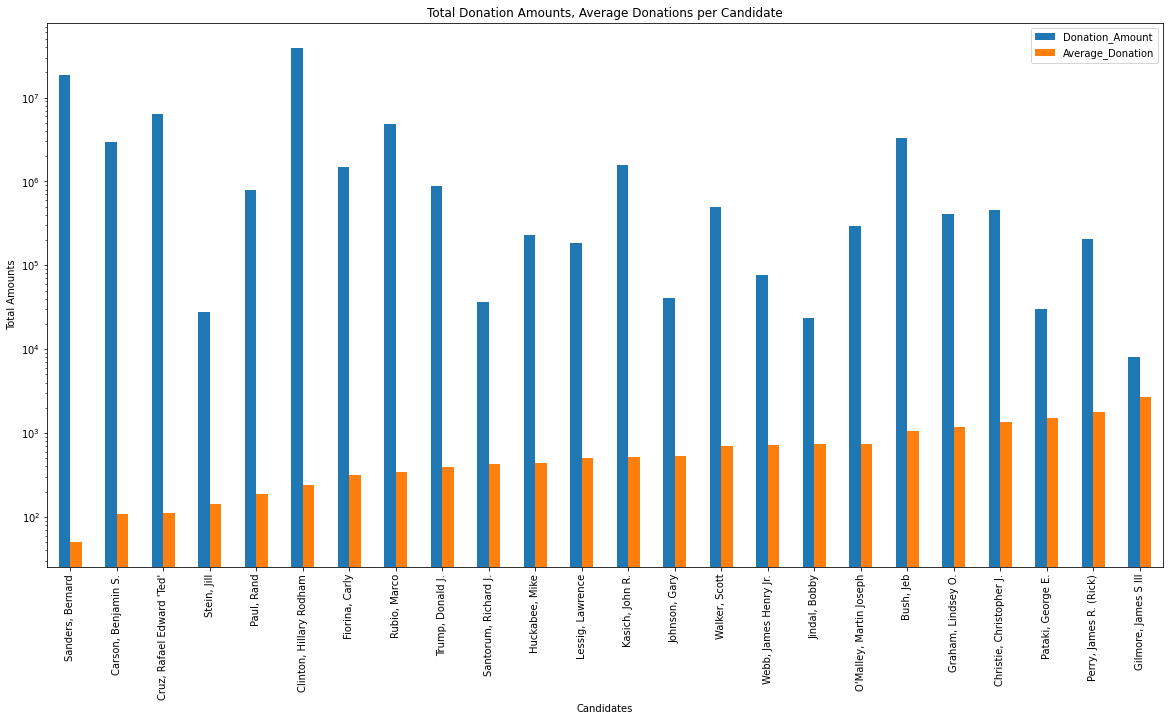

In [14]:
# 2e YOUR CODE HERE

print(df_combined.columns)

df_combined.plot(    
    y=['Donation_Amount', 'Average_Donation'], kind='bar', logy= True, 
    figsize=(20,10), title= 'Total Donation Amounts, Average Donations per Candidate', ylabel='Total Amounts', xlabel = 'Candidates') 


**2f. Comment on the results of your data analysis in a short paragraph.**

- There are several interesting conclusions you can draw from the table you have created.
- What have you learned about campaign contributions in California?
- We are looking for data insights here rather than comments on the code!

`2f YOUR RESPONSE HERE`

A lot of money was raised in CA. The total funds raised in CA were $82,793,229.51. I also discovered that even though some candidates received a lot of lower dollar donations, they also received a high count of donors. With these two insights we can see that some candidates still raised a lot of money.


## 3. Exploring Donor Occupations (30 points)

Above in part 2, we saw that some simple data analysis can give us insights into the campaigns of our candidates. Now let's quickly look to see what *kind* of person is donating to each campaign using the `contbr_occupation` variable.

**3a. Show the top 5 occupations of individuals that contributed to Hillary Clinton.** 

- Subset your data to create a dataframe with only donations for Hillary Clinton.
- Then use the `value_counts` and `head` methods to present the top 5 occupations (`contbr_occupation`) for her donors.
- Note: we are just interested in the count of donations, not the value of those donations.

In [15]:
# 3a YOUR CODE HERE

df_clinton = pd.DataFrame( df[ (df.cand_nm == 'Clinton, Hillary Rodham') ] )

# sort the dataframe by the contribution amount
df_count_clinton = pd.DataFrame(df_clinton['contbr_occupation'].value_counts(ascending=False))

# list top 5 
df_count_clinton.head(5)


,contbr_occupation
RETIRED,33450
ATTORNEY,7315
INFORMATION REQUESTED,4742
TEACHER,3591
HOMEMAKER,3436


**3b. Write a function called `get_donors`.**

Imagine that you want to do the previous operation on several candidates.  To keep your work neat, you want to take the work you did on the Clinton-subset and wrap it in a function that you can apply to other subsets of the data.

- The function should take a DataFrame as a parameter, and return a Series containing the counts for the top 5 occupations contained in that DataFrame.

In [16]:
def get_donors(df):
    """This function takes a dataframe that contains a variable named contbr_occupation.
    It outputs a Series containing the counts for the 5 most common values of that
    variable."""
    
    # 3b YOUR CODE HERE
    ds_top_cand = df.value_counts()
            
    return ds_top_cand


**3c. Now run the `get_donors` function on subsets of the dataframe corresponding to three candidates. Show each of the three candidates below.**

- Hillary Clinton
- Bernie Sanders
- Donald Trump

In [17]:
# 3c YOUR CODE HERE

df_clinton = pd.DataFrame( df[ (df.cand_nm == 'Clinton, Hillary Rodham') ] )
ds_clinton = get_donors(df_clinton['contbr_occupation'])
print('Clinton Top Donors')
print(ds_clinton)

df_sanders = pd.DataFrame( df[ (df.cand_nm == 'Sanders, Bernard') ] )
ds_sanders = get_donors(df_sanders['contbr_occupation'])
print('Sanders Top Donors')
print(ds_sanders)

df_trump = pd.DataFrame( df[ (df.cand_nm == 'Trump, Donald J.') ] )
ds_trump = get_donors(df_trump['contbr_occupation'])
print('Trump Top Donors')
print(ds_trump)


Clinton Top Donors
RETIRED                      33450
ATTORNEY                      7315
INFORMATION REQUESTED         4742
TEACHER                       3591
HOMEMAKER                     3436
                             ...  
DEPUTY CLERK                     1
CALIFORNIA STATE ASSEMBLY        1
CMO STUBHUB                      1
ATTORNEY/ACADEMIC                1
DIVISION DIRECTOR                1
Name: contbr_occupation, Length: 6719, dtype: int64
Sanders Top Donors
NOT EMPLOYED                   96371
RETIRED                        15048
TEACHER                        10167
SOFTWARE ENGINEER               7861
ENGINEER                        7094
                               ...  
SELF CONTRACTOR                    1
CHARACTER DESIGNER                 1
VOCALIST, SINGER/SONGWRITER        1
ENVIRONMENTAL DESIGNER             1
GFX ARTIST                         1
Name: contbr_occupation, Length: 8571, dtype: int64
Trump Top Donors
RETIRED                                   849
INF

**3d. Finally, use `groupby` to separate the entire dataset by candidate.**

- Call .apply(get_donors) on your groupby object, which will apply the function you wrote to each subset of your data.
- Look at your output and marvel at what pandas can do in just one line!

In [18]:
# 3d YOUR CODE HERE

# group all data by candidate name
df_group = df.groupby('cand_nm')

# apply function to all data
df_group.apply(lambda x: get_donors(x['contbr_occupation']))


cand_nm                                        
Bush, Jeb              RETIRED                     996
                       HOMEMAKER                   180
                       ATTORNEY                     92
                       Q.A.                         89
                       PRESIDENT                    84
                                                  ... 
Webb, James Henry Jr.  PHYSICIAN                     1
                       HEALTH CARE                   1
                       ENGINEERING MANAGER           1
                       INVESTMENT MANAGEMENT         1
                       ADMINISTRATIVE LAW JUDGE      1
Name: contbr_occupation, Length: 23303, dtype: int64

**3e. Comment on your data insights & findings in a short paragraph.**

`3e YOUR RESPONSE HERE`

With the rich data set from the 2016 election cycle, I was able to produce great insights. I was able to find the largest donations to each candidate. I could dig deep into other attributes about the data, like what occupations donated to each candidate. Discovering the donation count and average donation amount was very eye opening. 


**3f. Think about your findings in section 3 vs. your findings in section 2 of this assignment.**

Do you have any new data insights into the results you saw in section 2 now that you see the top occupations for each candidate?

`3f YOUR RESPONSE HERE`

Understanding which occupations donated to which candidates was very insightful. We could cross correlate with other features to really understand where candidates could focus their attention to win new voters. 


## 4. Plotting Data (20 points)

There is an important element that we have not yet explored in this dataset - time.

**4a. Present a single line chart with the following elements.**

- Show the date on the x-axis
- Show the contribution amount on the y-axis
- Include a title
- Include axis labels

<AxesSubplot:title={'center':'Donations by Time'}, xlabel='Dates', ylabel='Amounts'>

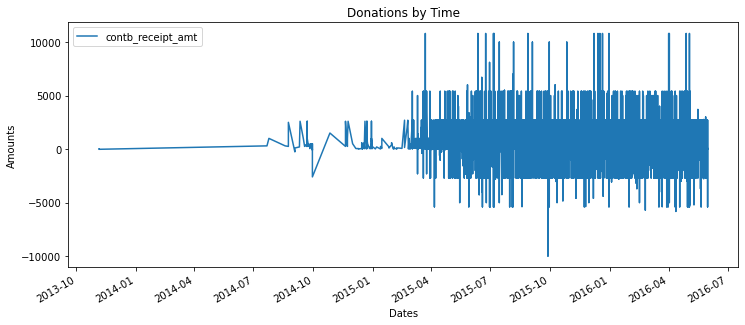

In [5]:
# 4a YOUR CODE HERE

df.plot(x ='contb_receipt_dt', y='contb_receipt_amt', kind = 'line', 
        figsize=(12,5), title= 'Donations by Time', ylabel='Amounts', xlabel = 'Dates')	


**4b. Make a better time-series line chart**

This chart is messy and it is hard to gain insights from it.  Improve the chart from 4a so that your new chart shows a specific insight. In the spot provided, write the insight(s) that can be gained from this new time-series line chart.

<AxesSubplot:title={'center':'Donations by Time'}, xlabel='Dates', ylabel='Amounts'>

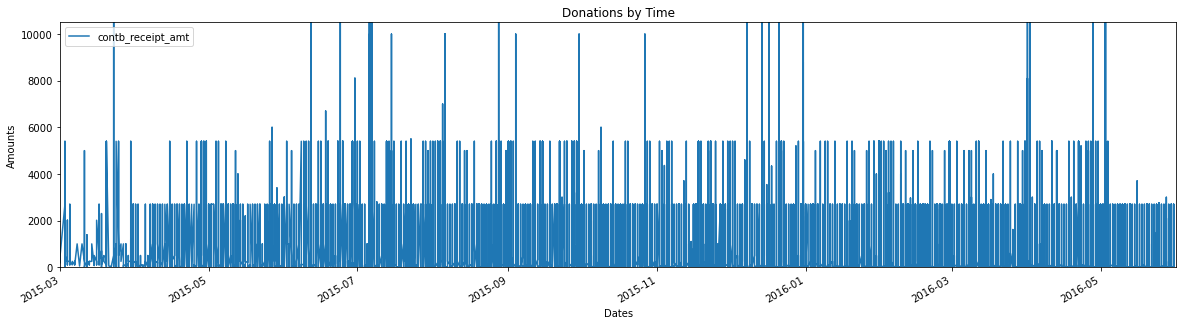

In [17]:
# 4b YOUR CODE HERE

# df.set_index('contb_receipt_dt').plot()

df.plot(x ='contb_receipt_dt', y='contb_receipt_amt', kind = 'line', 
        figsize=(20,5), title= 'Donations by Time', ylabel='Amounts', xlabel = 'Dates', ylim=(0, 10500), xlim=('2015-03', '2016-06') )


# plt.suptitle('Contribution Amounts')
# plt.xlabel('contb_receipt_dt')
# plt.ylabel('contb_receipt_amt')
# plt.ylim(0,10)
# plt.xlim(0,10)
# plt.plot(df['contb_receipt_dt'], df['contb_receipt_amt']) # , bins=[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 200, 250, 300, 350, 400, 500, 550])

# plt.plot(df['contb_receipt_amt'], bins=[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 200, 250, 300, 350, 400, 500, 550])




`4b YOUR RESPONSE HERE`

As you can see between March 2015 and the end of the election is when most of the activity happens. We can also see that the ave donation amount is low compared t some high donor individuals. 


## If you have feedback for this homework, please submit it using the link below:

http://goo.gl/forms/74yCiQTf6k